In [70]:
import pandas as pd
import json
import numpy as np 
from IPython.display import HTML, display
from matplotlib import pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

def get_circle_from_xy(x_loc, y_loc):
    center_df_search = center_df.copy()
    center_df_search['x_delta'] = center_df_search['x'] - y_loc
    center_df_search['y_delta'] = (center_df_search['y'] - x_loc)*3

    center_df_search['r2'] = center_df_search['x_delta']**2 + center_df_search['y_delta']**2
    center_df_search = center_df_search.sort_values('r2')
    circle_id = center_df_search.index[0]
    return circle_id

In [299]:
# file_path = 'C:/Users/theV/Downloads/parking-out.json'
# zone_string = 'kkehh609uocjm841u3i'
# zone_string = '9lqb0wo2b1ijle41keg'
# zone_string = 'qnc28mot4mojlqxamld'
# zone_string = 'kovvhp7ti2cjj7i3hxx'
zone_string = '435ocv1ke67jl8azlcd'
zone_string = 'f477a661-0f9c-4bc7-aa14-285bebc6a2ef'

file_path = 'C:/Users/theV/Downloads/parkingdata/PKOUT_10days_%s.json' % zone_string

with open(file_path, 'r') as f:
    out_data = json.load(f) 
    
# file_path = 'C:/Users/theV/Downloads/parking-in.json'
file_path = 'C:/Users/theV/Downloads/parkingdata/PKIN_10days_%s.json' % zone_string
with open(file_path, 'r') as f:
    in_data = json.load(f)

In [300]:
# parking_out_events = out_data['content']
# parking_in_events = in_data['content']
parking_out_events = out_data
parking_in_events = in_data

event_data_by_object_id = {}

x_center = 32.71878073059303
y_center = -117.1588819956279

for parking_out_event in parking_out_events:
    timestamp = parking_out_event['timestamp']
    object_id = parking_out_event['properties']['objectUid']
    location_id = parking_out_event['locationUid']
    asset_id = parking_out_event['assetUid']
    
    coordinate_str = parking_out_event['properties']['geoCoordinates']
    corner_splits = coordinate_str.split(',')
    x_vals = []
    y_vals = []
    for corner_split in corner_splits:
        splits = corner_split.split(':')
        x = float(splits[0])
        y = float(splits[1])
        x_vals.append(x)
        y_vals.append(y)
        
    x_mean = (np.mean(x_vals)-x_center)*1e6
    y_mean = (np.mean(y_vals)-y_center)*1e6
    event_data = {'timestamp_out': timestamp, 
                  'location_id_out': location_id,
                  'asset_id_out': asset_id, 
                  'x_out': x_mean,
                  'y_out': y_mean}
    
    event_data_by_object_id[object_id] = event_data   
    
for parking_in_event in parking_in_events:
    timestamp = parking_in_event['timestamp']
    object_id = parking_in_event['properties']['objectUid']
    location_id = parking_in_event['locationUid']
    asset_id = parking_in_event['assetUid']
    coordinate_str = parking_in_event['properties']['geoCoordinates']
    corner_splits = coordinate_str.split(',')
    x_vals = []
    y_vals = []
    for corner_split in corner_splits:
        splits = corner_split.split(':')
        x = float(splits[0])
        y = float(splits[1])
        x_vals.append(x)
        y_vals.append(y)
        
    x_mean = (np.mean(x_vals)-x_center)*1e6
    y_mean = (np.mean(y_vals)-y_center)*1e6
        
    if object_id in event_data_by_object_id:
        event_data_by_object_id[object_id]['timestamp_in'] = int(timestamp)
        event_data_by_object_id[object_id]['location_id_in'] = location_id
        event_data_by_object_id[object_id]['asset_id_in'] = asset_id
        event_data_by_object_id[object_id]['x_in'] = x_mean
        event_data_by_object_id[object_id]['y_in'] = y_mean
    else:
        event_data_by_object_id[object_id] = {}
        event_data_by_object_id[object_id]['timestamp_in'] = timestamp
        event_data_by_object_id[object_id]['location_id_in'] = location_id
        event_data_by_object_id[object_id]['asset_id_in'] = asset_id
        event_data_by_object_id[object_id]['x_in'] = x_mean
        event_data_by_object_id[object_id]['y_in'] = y_mean

In [301]:
data_df = pd.DataFrame.from_dict(event_data_by_object_id, orient='index')
data_df = data_df.sort_values('timestamp_in')
data_df['seconds_in'] = (data_df['timestamp_in']-data_df['timestamp_in'].values[0])/1e3
data_df['seconds_out'] = (data_df['timestamp_out']-data_df['timestamp_in'].values[0])/1e3

In [302]:
print(len(out_data), len(in_data))

178 198


In [303]:
circle_ids = []
for idx, row in data_df.iterrows():
    circle_id = get_circle_from_xy(row['x_in'], row['y_in'])
    circle_ids.append(circle_id)

data_df['circle_id'] = circle_ids

In [304]:
data_df

,timestamp_out,location_id_out,asset_id_out,x_out,y_out,timestamp_in,location_id_in,asset_id_in,x_in,y_in,seconds_in,seconds_out,circle_id
1555268516,1.555218e+12,ujt2dwighojmap99j4,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1008.893435,2130.538189,1.555218e+12,ujt2dwighojmap99j4,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1010.088464,2135.982316,0.000,929.875,4
1555278561,1.555223e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1120.729758,2257.812801,1.555222e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1120.365961,2257.608825,4169.460,5009.197,4
1555285006,1.555231e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1119.119886,2256.772916,1.555228e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1118.679542,2256.800525,9988.683,13408.391,4
1555231795,1.555234e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1179.374569,2255.252308,1.555232e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1177.964861,2254.894742,14379.959,16719.886,4
1555240491,1.555271e+12,435ocv1ke67jl8azlcd,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-887.279066,2079.005612,1.555247e+12,435ocv1ke67jl8azlcd,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-888.290366,2078.953128,29528.136,53284.263,4
1555241462,1.555298e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1119.043256,2256.316546,1.555248e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1118.515879,2255.184403,30517.965,80220.720,4
1555244718,1.555255e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1175.127621,2255.741247,1.555253e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1176.418830,2255.660108,35107.385,37147.300,4
1555248507,1.555308e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1177.419786,2256.916100,1.555256e+12,a5a08x2t35jkip3zsr,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1174.823341,2256.202649,38016.976,90119.475,4
1555255908,1.555271e+12,ujt2dwighojmap99j4,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1031.486718,2150.108333,1.555262e+12,ujt2dwighojmap99j4,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-1031.563645,2148.019164,44615.696,53314.438,4
1555272645,1.555283e+12,435ocv1ke67jl8azlcd,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-891.232544,2083.401685,1.555271e+12,435ocv1ke67jl8azlcd,f477a661-0f9c-4bc7-aa14-285bebc6a2ef,-890.054567,2086.835134,53284.264,65913.285,4


In [311]:
data_df.groupby('location_id_in').count()

,timestamp_out,location_id_out,asset_id_out,x_out,y_out,timestamp_in,asset_id_in,x_in,y_in,seconds_in,seconds_out,circle_id
location_id_in,,,,,,,,,,,,
435ocv1ke67jl8azlcd,56,56,56,56,56,61,61,61,61,61,56,61
a5a08x2t35jkip3zsr,111,111,111,111,111,125,125,125,125,125,111,125
ujt2dwighojmap99j4,10,10,10,10,10,12,12,12,12,12,10,12


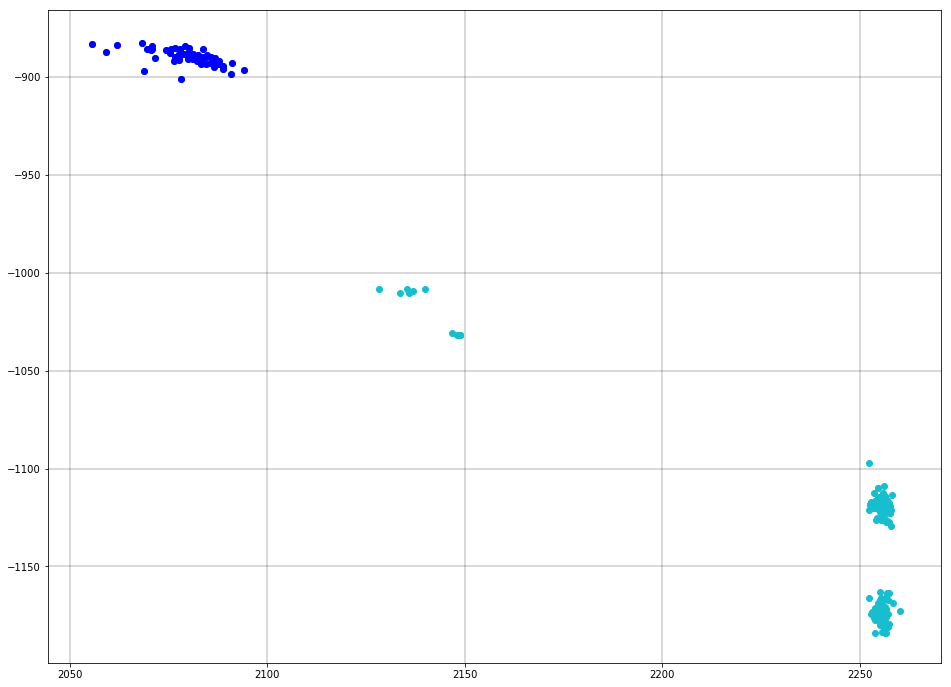

In [308]:
fig = plt.figure(figsize=(16, 12))  
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')

for i in range(0,5):
    filter_df = data_df[(data_df['circle_id'] == i) & (data_df['asset_id_in'] == '187bacfd-06cf-42ce-b393-9e58fb96c9ce')]
    plt.scatter(filter_df.y_in, filter_df.x_in)
    filter_df = data_df[(data_df['circle_id'] == i) & (data_df['asset_id_in'] == 'f477a661-0f9c-4bc7-aa14-285bebc6a2ef')]
    plt.scatter(filter_df.y_in, filter_df.x_in)
    filter_df = data_df_save[(data_df_save['circle_id'] == i) & (data_df_save['asset_id_in'] == 'f477a661-0f9c-4bc7-aa14-285bebc6a2ef')]
    plt.scatter(filter_df.y_in, filter_df.x_in, color='b')
    
for i in range(0,5):
    center_row = center_df.iloc[i]
#     plt.scatter(center_row['x'], center_row['y'], color='k', s=100)
    
plt.show()

In [298]:
data_df_save = data_df

In [249]:
final_df_list = []

for c_id in range(0,6):

    my_data = data_df[data_df.circle_id == c_id]
    my_data['time_since_last_in'] = my_data['seconds_in'].diff()
    my_data = my_data.reset_index()
    my_data = my_data[my_data['time_since_last_in'] >240]
    # my_data['parking_time'] = 0
    # my_data['parking_time'] = my_data['seconds_in'] - my_data['seconds_out'].shift(1)
    my_data = my_data.dropna()
    # display(my_data)

    cars_in = 0
    car_out_times = []
    cars_parked_data = {}
    cars_parked_plot_data = []
    last_time_car_left_list = []
    for idx, row in my_data.iterrows():

        car_id = row.name
        time_in = row['seconds_in']
        time_out = row['seconds_out']
        current_time = time_in
        print('car', current_time)
        cars_parked_data[car_id] = {'park_out_time': time_out}

        hit_list = []
        last_time_car_left = 0
        for key, value in cars_parked_data.items():
            if value['park_out_time'] < current_time:

                last_time_car_left = current_time - value['park_out_time']
                print('previous car is leaving', value['park_out_time'], last_time_car_left)
                hit_list.append(key)

        for key in hit_list:
            cars_parked_data.pop(key, None)
        print('previous car is leaving', last_time_car_left)
        last_time_car_left_list.append(last_time_car_left)
    #     print('Current Cars', len(cars_parked_data))
        cars_parked_plot_data.append({'x_time': current_time, 'y_count': len(cars_parked_data)})

    plot_df = pd.DataFrame(cars_parked_plot_data)
    if len(last_time_car_left_list)>0:
        final_df = pd.DataFrame(last_time_car_left_list)
        final_df = final_df[final_df[0]>10]
        final_df = final_df[final_df[0]<3600]

        final_df_list.append(final_df)
    
merged_df = pd.concat(final_df_list,axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


car 18057.98
previous car is leaving 0
car 43523.217
previous car is leaving 18807.781 24715.435999999998
previous car is leaving 24715.435999999998
car 54406.26
previous car is leaving 44932.983 9473.277000000002
previous car is leaving 9473.277000000002
car 56776.221
previous car is leaving 55516.218 1260.002999999997
previous car is leaving 1260.002999999997
car 71953.777
previous car is leaving 67874.119 4079.657999999996
previous car is leaving 4079.657999999996
car 104075.717
previous car is leaving 76002.872 28072.845
previous car is leaving 28072.845
car 119848.517
previous car is leaving 0
car 134185.102
previous car is leaving 134185.101 0.0010000000183936208
previous car is leaving 0.0010000000183936208
car 136794.814
previous car is leaving 134190.01 2604.8040000000037
previous car is leaving 2604.8040000000037
car 163974.862
previous car is leaving 136824.738 27150.12399999998
previous car is leaving 161812.337 2162.524999999994
previous car is leaving 2162.524999999994
ca

In [242]:
last_time_car_left_list

[]

                 0
count   318.000000
mean   1031.002619
std     930.491677
min      19.578000
25%     240.200500
50%     690.067500
75%    1572.198500
max    3510.387000


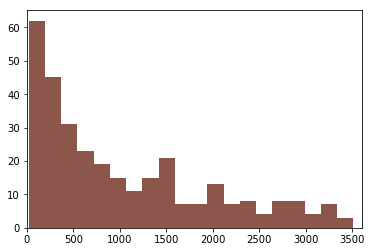

In [250]:

# print(df)
print(merged_df.describe())
plt.hist(merged_df[0], bins =20)
plt.xlim(0,3600)
plt.show()

In [233]:
# last_time_car_left_list

In [189]:
plot_df

,x_time,y_count
0,8885.001,1
1,34814.592,1
2,44542.883,1
3,47632.218,1
4,48704.054,1
5,50564.453,1
6,72825.720,1
7,78856.873,1
8,94063.304,1
9,94759.314,1


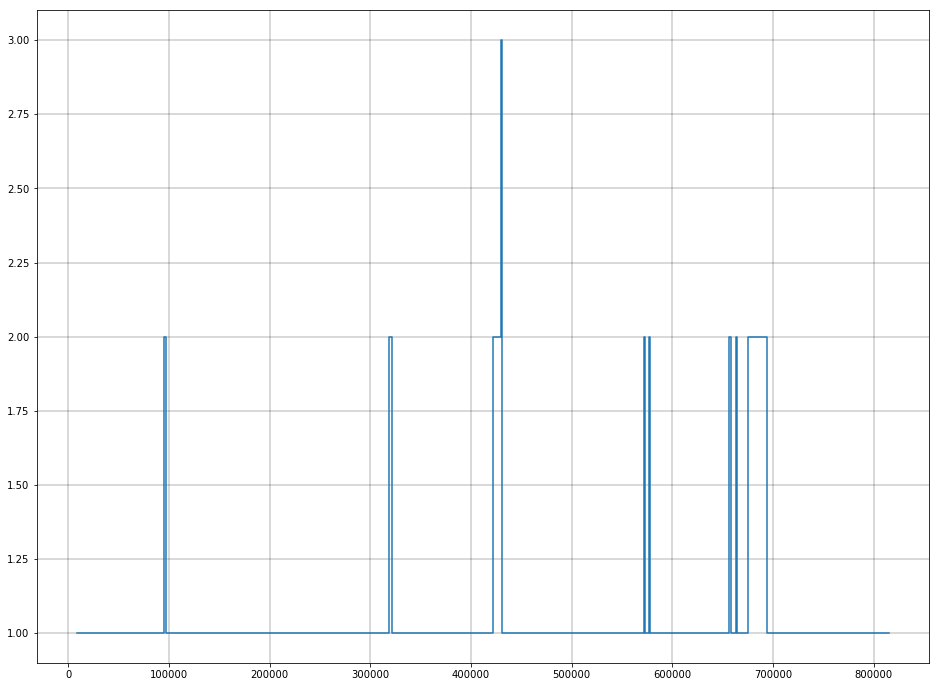

In [190]:
fig = plt.figure(figsize=(16, 12))  
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.step(plot_df.x_time, plot_df.y_count)
plt.show()

In [150]:
cars_parked_data

{'1555350521': {'park_out_time': nan},
 '1555507807': {'park_out_time': nan},
 '1555523653': {'park_out_time': nan},
 '1555720868': {'park_out_time': nan},
 '1555731471': {'park_out_time': nan},
 '1555734000': {'park_out_time': nan},
 '1555835532': {'park_out_time': nan},
 '1555839232': {'park_out_time': nan},
 '1555860646': {'park_out_time': nan},
 '1555870284': {'park_out_time': nan},
 '1556010589': {'park_out_time': nan},
 '1556014831': {'park_out_time': nan},
 '1556097678': {'park_out_time': nan},
 '1556101181': {'park_out_time': nan},
 '1556252628': {'park_out_time': nan}}

In [69]:
centers_list = []
centers = [-240,22]
centers_list.append(centers)

centers = [-175,20]
centers_list.append(centers)

centers = [-105,15]
centers_list.append(centers)

centers = [-35,12]
centers_list.append(centers)

centers = [40,10]
centers_list.append(centers)

center_df = pd.DataFrame(centers_list)
center_df.columns = ['x', 'y']

# print(centers_list)
# circle1 = plt.Circle((-240,22), 5, alpha=0.5)
# circle2 = plt.Circle((-175,20), 5, alpha=0.5)
# circle3 = plt.Circle((-105,15), 5, alpha=0.5)
# circle4 = plt.Circle((-30,13), 5, alpha=0.5)
# circle5 = plt.Circle((40,10), 5, alpha=0.5)

In [21]:
center_df_search = center_df.copy()

x_loc = 1
y_loc = -1
center_df['x_delta'] = center_df['x'] - x_loc
center_df['y_delta'] = center_df['y'] - y_loc

center_df['r2'] = center_df['x_delta']**2 + center_df['y_delta']**2
center_df = center_df.sort_values('r2')
circle_id = center_df.index[0]
display(center_df)

,x,y,x_delta,y_delta,r2
3,-30,13,-31,14,1157
4,-40,10,-41,11,1802
2,-105,15,-106,16,11492
1,-175,20,-176,21,31417
0,-240,22,-241,23,58610


In [98]:
data_in_out = data_df.dropna()
data_in_out['parking_time'] = (data_in_out['timestamp_out'] - data_in_out['timestamp_in'])/1e3

In [100]:
data_in_out['parking_time'].describe()

count       91.000000
mean      4992.831538
std       7373.735957
min        209.928000
25%        780.021000
50%       2220.473000
75%       4455.095000
max      33179.895000
Name: parking_time, dtype: float64

In [101]:
data_in_out

,timestamp_out,location_id_out,asset_id_out,x_out,y_out,timestamp_in,location_id_in,asset_id_in,x_in,y_in,parking_time
1555601021,1.555610e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,2.069408,32.436250,1.555605e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,1.556010,25.710804,4559.936
1555618817,1.555612e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,5.618273,46.436630,1.555611e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,5.618273,46.436630,1050.428
1555619954,1.555615e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,0.495015,128.465991,1.555611e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,-2.282721,127.354577,3870.727
1555623633,1.555611e+12,qnc28mot4mojlqxamld,7970e316-13ab-4a85-bdb7-3db90bbb5946,5.492321,-67.614042,1.555603e+12,qnc28mot4mojlqxamld,7970e316-13ab-4a85-bdb7-3db90bbb5946,5.981944,-67.801415,7740.789
1555623977,1.555613e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,4.955385,37.653936,1.555613e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,4.955385,37.653936,540.160
1555625508,1.555614e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,-20.240761,-4.349462,1.555613e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,-20.934882,-12.714204,690.282
1555625528,1.555606e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,17.453138,57.996002,1.555604e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,17.616380,57.977534,2220.865
1555625826,1.555626e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.493844,52.591566,1.555626e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.496478,52.079956,419.928
1555625827,1.555627e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.624156,-122.716750,1.555626e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.247145,-124.014301,1499.804
1555625959,1.555626e+12,qnc28mot4mojlqxamld,57faa069-81c5-4ea4-9e99-7af2c1818499,22.819849,-240.383243,1.555626e+12,qnc28mot4mojlqxamld,57faa069-81c5-4ea4-9e99-7af2c1818499,23.896500,-241.137448,389.968


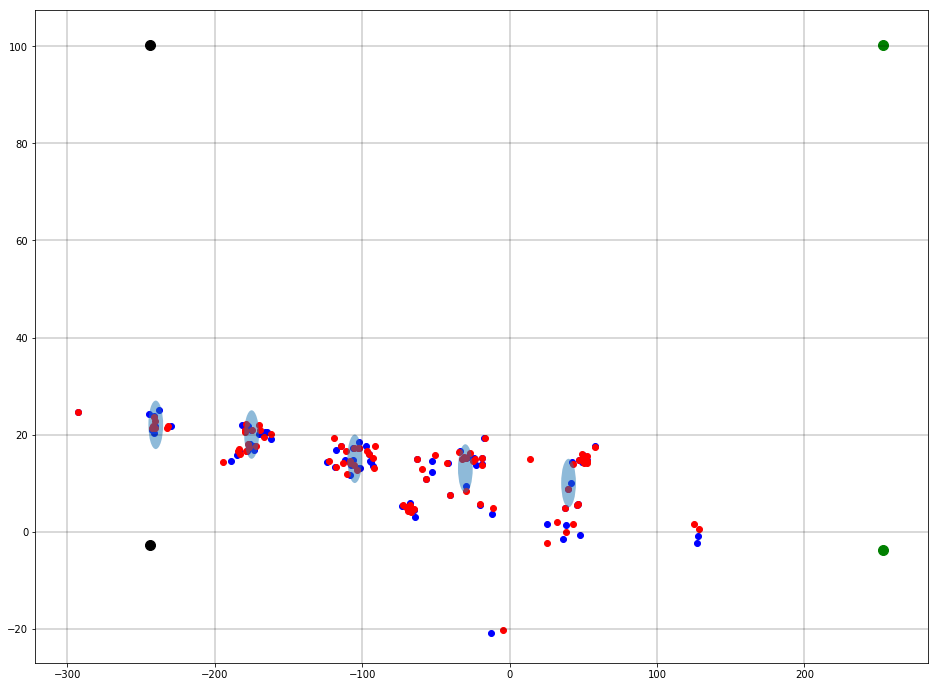

In [171]:

fig = plt.figure(figsize=(16, 12))  
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.scatter(data_in_out.y_in, data_in_out.x_in, color='b')
plt.scatter(data_in_out.y_out, data_in_out.x_out, color= 'r')
plt.scatter((-117.159126-y_center)*1e6, (32.718778-x_center)*1e6, color='k', s=100)
plt.scatter((-117.158629-y_center)*1e6, (32.718777-x_center)*1e6, color='g', s=100)
plt.scatter( (-117.159126-y_center)*1e6,(32.718881-x_center)*1e6, color='k', s=100)
plt.scatter( (-117.158629-y_center)*1e6,(32.718881-x_center)*1e6, color='g', s=100)
# circle1 = plt.Circle((-240,22), 5, alpha=0.5)
# circle2 = plt.Circle((-175,20), 5, alpha=0.5)
# circle3 = plt.Circle((-105,15), 5, alpha=0.5)
# circle4 = plt.Circle((-30,13), 5, alpha=0.5)
# circle5 = plt.Circle((40,10), 5, alpha=0.5)

ax = plt.gca()
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
real_spot = [32.718807, -117.159115]

plt.show()

In [149]:
y_center

-117.1588819956279

In [143]:
data_in_out['x_in'].values/1e6+x_center

for idx, row in data_in_out.iterrows():
    x_val = row['x_in']
    y_val = row['y_in']
    print('%5.15f' % (x_val/1e6+x_center), '%5.15f' % (y_val/1e6+y_center))

32.718782286603506 -117.158856284824338
32.718786348866360 -117.158835558998391
32.718778447871983 -117.158754641050990
32.718786712536563 -117.158949797042709
32.718785685977814 -117.158844341691633
32.718759795711435 -117.158894709832069
32.718798346972683 -117.158824018094393
32.718795227070586 -117.158829915672015
32.718794977738277 -117.159006009928902
32.718804627093398 -117.159123133075497
32.718797619575170 -117.159000036746335
32.718795088233271 -117.158832795785074
32.718800993439871 -117.159123291657266
32.718794964791236 -117.158923461146188
32.718795383522554 -117.158830457931344
32.718793066429740 -117.158934811044986
32.718779234524980 -117.158845876303957
32.718779816411889 -117.158754447852004
32.718781988520533 -117.158843607059026
32.718795275423517 -117.158934510268821
32.718796158166185 -117.158909973716248
32.718794749965276 -117.158900846389542
32.718785254889553 -117.158947086739573
32.718796741897599 -117.158977160723268
32.718797278604789 -117.159065226324756


In [142]:
row

timestamp_out                               1.55561e+12
location_id_out                     qnc28mot4mojlqxamld
asset_id_out       d002efc7-ceae-4576-8053-55c6b610f902
x_out                                           2.06941
y_out                                           32.4362
timestamp_in                                 1.5556e+12
location_id_in                      qnc28mot4mojlqxamld
asset_id_in        d002efc7-ceae-4576-8053-55c6b610f902
x_in                                            1.55601
y_in                                            25.7108
parking_time                                    4559.94
Name: 1555601021, dtype: object

In [122]:
print(x_center)

32.71878073059303


In [125]:
print(val/1e6+x_center)

32.718801726


In [139]:
print('%5.15f' % (data_in_out['x_in'].values[0]/1e6+x_center))

32.718782286603506


In [173]:
data_df.sort_values('timestamp_in')

,timestamp_out,location_id_out,asset_id_out,x_out,y_out,timestamp_in,location_id_in,asset_id_in,x_in,y_in
1555623633,1.555611e+12,qnc28mot4mojlqxamld,7970e316-13ab-4a85-bdb7-3db90bbb5946,5.492321,-67.614042,1.555603e+12,qnc28mot4mojlqxamld,7970e316-13ab-4a85-bdb7-3db90bbb5946,5.981944,-67.801415
1555625528,1.555606e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,17.453138,57.996002,1.555604e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,17.616380,57.977534
1555601021,1.555610e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,2.069408,32.436250,1.555605e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,1.556010,25.710804
1555632748,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.187608,52.816815,1.555606e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.652930,51.537697
1555639438,1.555612e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,13.685450,-18.502699,1.555608e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.019372,-18.850762
1555688757,1.555612e+12,qnc28mot4mojlqxamld,57faa069-81c5-4ea4-9e99-7af2c1818499,20.186829,-161.935088,1.555609e+12,qnc28mot4mojlqxamld,57faa069-81c5-4ea4-9e99-7af2c1818499,19.130232,-161.524160
1555643713,1.555612e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,16.553841,-184.187177,1.555609e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,16.548012,-183.230697
1555645955,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.964278,51.133675,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.649246,52.222024
1555648234,1.555611e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,15.918129,49.376568,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,15.756735,49.759946
1555618817,1.555612e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,5.618273,46.436630,1.555611e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,5.618273,46.436630


In [180]:
data_df.sort_values('timestamp_in')

,timestamp_out,location_id_out,asset_id_out,x_out,y_out,timestamp_in,location_id_in,asset_id_in,x_in,y_in
1555623633,1.555611e+12,qnc28mot4mojlqxamld,7970e316-13ab-4a85-bdb7-3db90bbb5946,5.492321,-67.614042,1.555603e+12,qnc28mot4mojlqxamld,7970e316-13ab-4a85-bdb7-3db90bbb5946,5.981944,-67.801415
1555625528,1.555606e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,17.453138,57.996002,1.555604e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,17.616380,57.977534
1555601021,1.555610e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,2.069408,32.436250,1.555605e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,1.556010,25.710804
1555632748,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.187608,52.816815,1.555606e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.652930,51.537697
1555639438,1.555612e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,13.685450,-18.502699,1.555608e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.019372,-18.850762
1555688757,1.555612e+12,qnc28mot4mojlqxamld,57faa069-81c5-4ea4-9e99-7af2c1818499,20.186829,-161.935088,1.555609e+12,qnc28mot4mojlqxamld,57faa069-81c5-4ea4-9e99-7af2c1818499,19.130232,-161.524160
1555643713,1.555612e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,16.553841,-184.187177,1.555609e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,16.548012,-183.230697
1555645955,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.964278,51.133675,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,14.649246,52.222024
1555648234,1.555611e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,15.918129,49.376568,1.555610e+12,qnc28mot4mojlqxamld,602d2d78-9b27-4e98-a32c-3b4aa25c5fbf,15.756735,49.759946
1555618817,1.555612e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,5.618273,46.436630,1.555611e+12,qnc28mot4mojlqxamld,d002efc7-ceae-4576-8053-55c6b610f902,5.618273,46.436630


In [293]:
data_df.groupby('asset_id_in').count()

,timestamp_out,location_id_out,asset_id_out,x_out,y_out,timestamp_in,location_id_in,x_in,y_in,seconds_in,seconds_out,circle_id
asset_id_in,,,,,,,,,,,,
187bacfd-06cf-42ce-b393-9e58fb96c9ce,247,247,247,247,247,276,276,276,276,276,247,276
f477a661-0f9c-4bc7-aa14-285bebc6a2ef,56,56,56,56,56,61,61,61,61,61,56,61


In [292]:
print((-898/1e6+x_center), ',', (1610/1e6+y_center))
print((-898/1e6+x_center),  ',',(1680/1e6+y_center))
print((-892.5/1e6+x_center), ',', (1775/1e6+y_center))
print((-889/1e6+x_center),  ',',(2080/1e6+y_center))

32.71788273059303 , -117.1572719956279
32.71788273059303 , -117.1572019956279
32.71788823059303 , -117.1571069956279
32.71789173059303 , -117.15680199562789
